## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
# reading the data
df=pd.read_csv('car_price_prediction.csv')

In [3]:
# Visualizing the table
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# 1. About the Data

This dataset is taken from Kaggle.com. This dataset is taken because of it's versatile nature of attributes along with size.Below the name of attributes along with the datatype is shown.

In [4]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

From the above table it can be realized that the datatype of some of the variable may not be right like Engine Volume, Mileage. We will deal with it it the later section.

# 2. Objectives

The main objective of this study will be to give good prediction. Because of the size of the dataset the interpretibility of the dataset can be quite complex.

1. At first, we will do Data cleaning and Feature Engineering.
2. Then we will fit a Linear regression model.
3. Atter evaluating the results we will try to fit polynominal features.
4. Then will we apply regularization techniques along with hyperparameter tuning to improve the predictive power of our model.

# 3.Data cleaning and Feature Engineering

The first step of this process to find out the duplicates and removing them from the dataset. From this operation ID attribute is used to find out the duplicates.

In [5]:
# Check for duplicate data
duplicate = df[df.duplicated(['ID'])]
duplicate

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


We can see from the above table that there are 313 duplicate rows. We need to remove them as they will act as a real datapoint in the model so model will give levearage towards datapoints of this specifications.

In [6]:
# drop duplicate datapoints
df.drop_duplicates(subset="ID", keep="first", inplace=True)

In [7]:
# Check for duplicate again
duplicate = df[df.duplicated(['ID'])]
duplicate

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags


So,we have dropped all the duplicate datapoints

Now.Lets check whether there is any columns with null value.
From the below table it can be seen that there is no null in any of the columns.

In [8]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
X=df.copy()

We make a copy of the Dataset. Let's look into the 'Levy' column.

In [10]:
X['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

From the above table it can be seen that there is 5706 columns with '-'. With these much unknown data for this variable it is wise to drop this column from the dataset which is done in the below column.

In [11]:
X.drop('Levy',axis=1,inplace=True)

Let's look in to the 'Manufacturer' column.

In [12]:
X["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

By inspecting the above array it can be said that there is no error in the names or no repeatation of names in the 'Manufacturer' column.

But by looking into the the 'Model' column it can be said that there is repeatation in the name with different extension.

In [13]:
# categories = X['Model'].value_counts().index.tolist()
# print(categories)
X['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

The total number of unique class for the variable 'Model' is 1590. There may be repeatation of the names. But fixing this issue can be quite time consuming. So, its  better to drop this column.

In [14]:
X['Model'].nunique()

1590

In [15]:
X.drop('Model',axis=1,inplace=True)

Now, Let's analyze the categorical variables. The name of the categorical variable is shown below.

In [16]:
mask = X.dtypes == np.object
categorical_cols = X.columns[mask]
print(categorical_cols)

Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color'],
      dtype='object')


In the below cell all the unique class for every categorical variable is shown.

In [17]:
for i in categorical_cols:
    print(i,':',X[i].unique())

Manufacturer : ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Category : ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Leather interior : ['Yes' 'No']
Fuel type : ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Engine volume : ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '4' '1.6' '3.3' '2.0 Turbo'
 '2.2 Turbo' '4.7' '1.5' '4.4' '3.0 Turbo' '1.4

By analyzing the above data it can be said that 'mileage' and 'Engine Volume' column should be of numeric type. So, we will convert this two variable to numeric type.

In [18]:
X['Engine volume'] = X['Engine volume'].str.split(' ').str[0]
X['Engine volume']=X['Engine volume'].astype(float)

In [19]:
X['Mileage'] = X['Mileage'].str.split(' ').str[0]
X['Mileage']=X['Mileage'].astype(float)

Let's check the datatype of the variables after the above operations.

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Prod. year        18924 non-null  int64  
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  float64
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Doors             18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(3), int64(4), object(9)
memor

We can seen that 'Engine volume' and 'Mileage' columns are sucessfully converted to numeric datatype.

Now, lets check the distribution of categorical varibles.

In [21]:
# distribution of categorical variables
mask_categorical = X.dtypes == np.object
category_cols = X.columns[mask_categorical]
category_cols=category_cols.tolist()
for col in category_cols:
    print("column name:", col)
    print("value_count:")
    print( X[col].value_counts())
    

column name: Manufacturer
value_count:
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
column name: Category
value_count:
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64
column name: Leather interior
value_count:
Yes    13731
No      5193
Name: Leather interior, dtype: int64
column name: Fuel type
value_count:
Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64
column name: Gear box type
value_count:
Automatic    1328

Let's check the distribution of the categorical variable visaully.

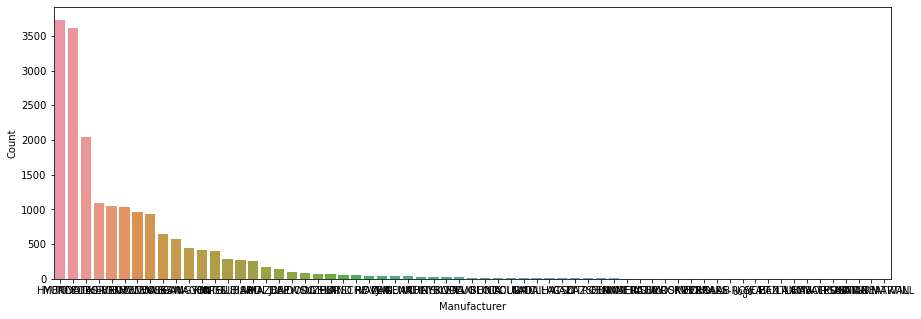

<Figure size 432x288 with 0 Axes>

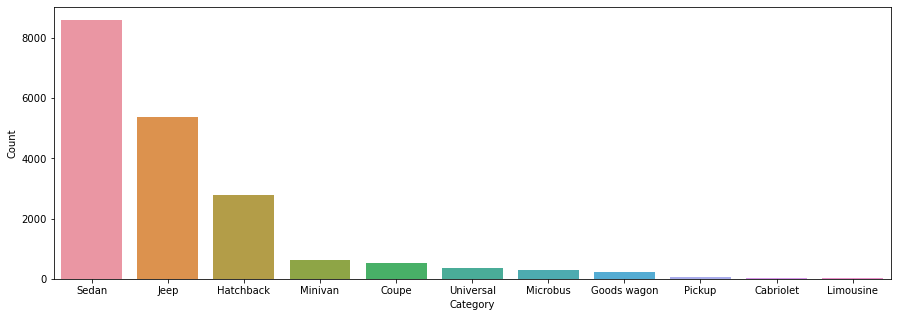

<Figure size 432x288 with 0 Axes>

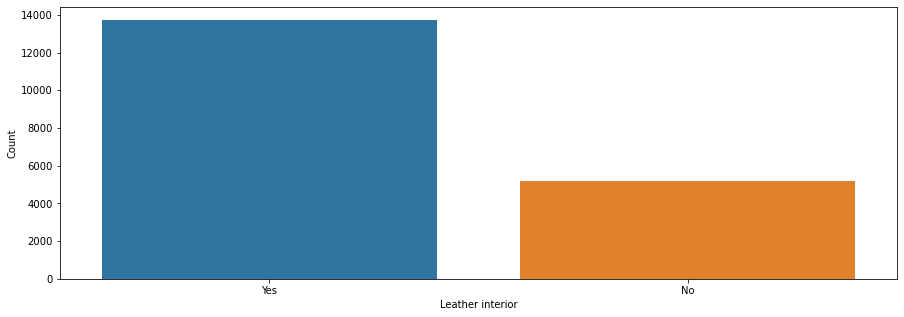

<Figure size 432x288 with 0 Axes>

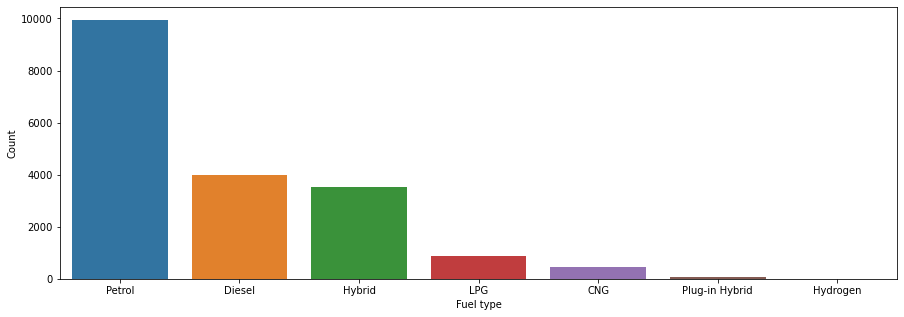

<Figure size 432x288 with 0 Axes>

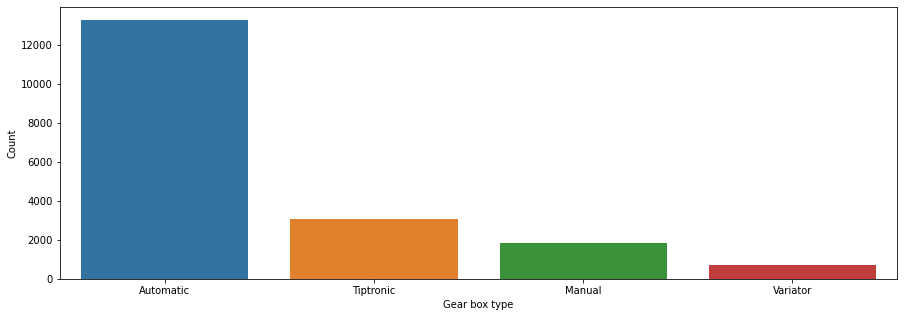

<Figure size 432x288 with 0 Axes>

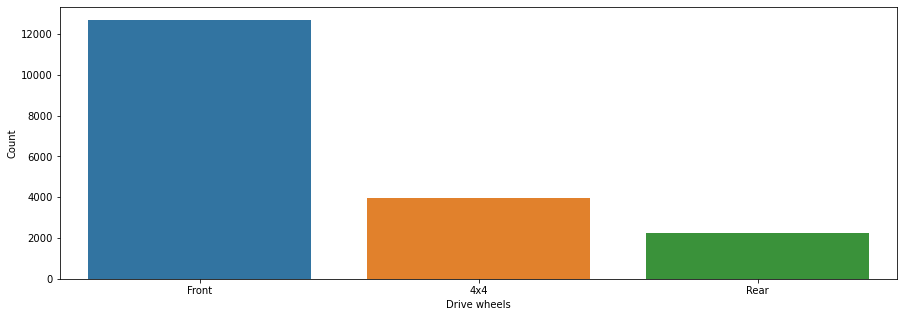

<Figure size 432x288 with 0 Axes>

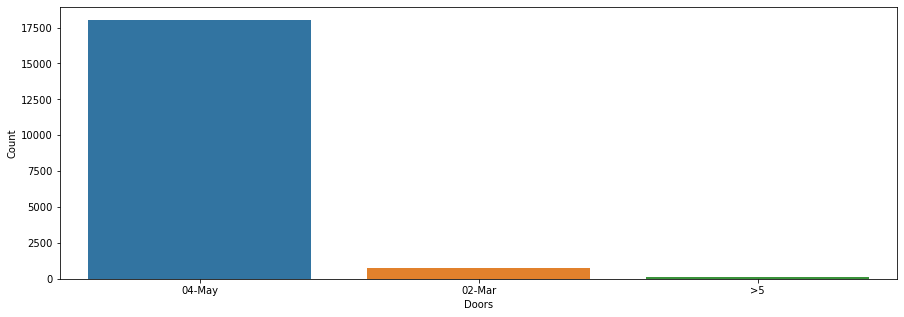

<Figure size 432x288 with 0 Axes>

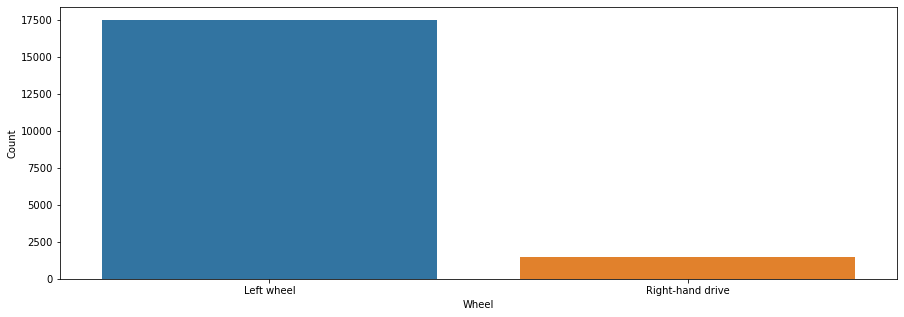

<Figure size 432x288 with 0 Axes>

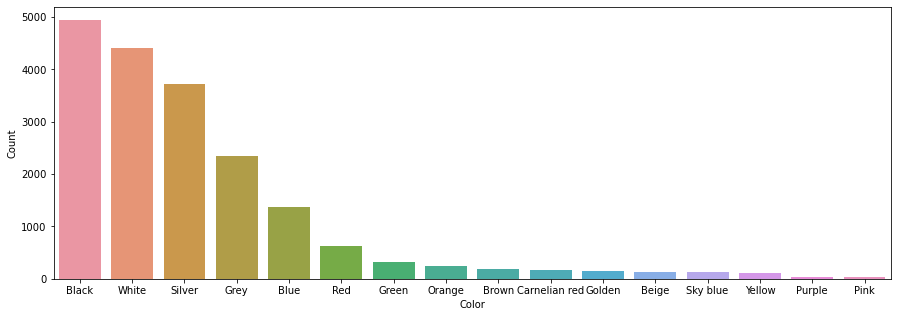

<Figure size 432x288 with 0 Axes>

In [22]:
# distribution of categorical variables
mask_categorical = X.dtypes == np.object
category_cols = X.columns[mask_categorical]
category_cols=category_cols.tolist()
for col in category_cols:
    fig, ax = plt.subplots(figsize = (15,5))
    plt1 = sns.countplot(data=X, x=col, order=X[col].value_counts().index)
    plt1.set(xlabel = col, ylabel= 'Count')
    plt.show()
    plt.tight_layout()

We can say that there is imbalance in the data. We might need to deal with it in the later stage.

For now, we can drop the column 'ID'.

In [23]:
X.drop('ID',axis=1,inplace=True)

Let's look into the distribution of the numeric variables.

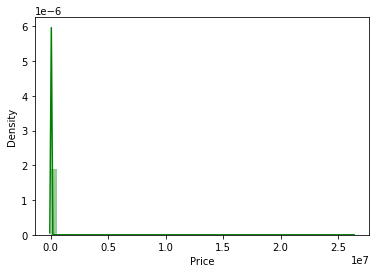

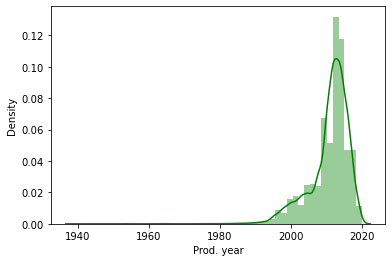

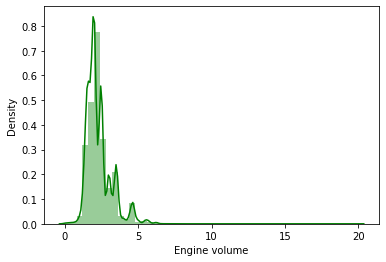

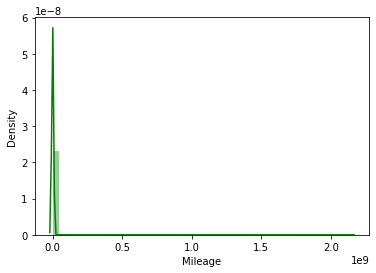

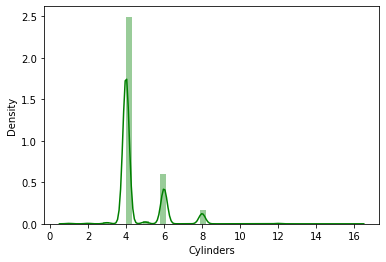

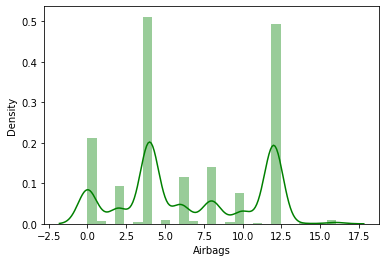

In [24]:
mask_numeric = X.dtypes != np.object
numeric_cols = X.columns[mask_numeric]
numeric_cols=numeric_cols.tolist()
for col in numeric_cols:
    sns.distplot(X[col],color='green',hist=True)
    plt.show()

For this analysis 'Price' is our dependent column. But the distribution of 'Price' is highly skewed. We need to fix this. Now, we have two options. Either we can consider the high price as outliers and can remove them or we can consider this distribution as true distribution and can transform this distribution. I will go for second option because in reality high- price car does exists but which are rare. 

First, let's do a normal test.

In [25]:
from scipy.stats.mstats import normaltest
normaltest(X.Price.values)

NormaltestResult(statistic=82592.96929228201, pvalue=0.0)

By looks of the statistics it can be  said that 'Price' variable completely failed the normaltest.

We will now transform the 'Price' variable column.

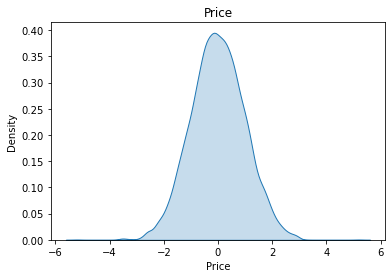

In [26]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',random_state=0)
X['Price']=qt.fit_transform(np.array(X['Price']).reshape(-1, 1))
sns.kdeplot(X['Price'], shade=True)
plt.title('Price')
plt.show() 

From the distribution of 'Price' variable it looks like we sucessfully able to convert previous distribution to normal distribution.

Let's do normaltest.

In [27]:
normaltest(X.Price.values)

NormaltestResult(statistic=4.477666384592924, pvalue=0.10658279347890812)

p-value is quite high compared to previous p-value. So, our claim looks good.

Another column which is highly skewed is 'Mileage'. Let's do normaltest on this variable.

In [28]:
from scipy.stats.mstats import normaltest
normaltest(X.Mileage.values)

NormaltestResult(statistic=53963.28907331486, pvalue=0.0)

The statistics also confirm that. But this instead of transforming the distribution we will try to remove some outliers so that this outliers don't causes diverse effect on the future ML models. The reason for this approach is also the fact that in 'Mileage' column there is lots of 0s which can problem in data transformation.

In [29]:
X=X[X['Mileage'] < 0.5e6]

Let's visualize the data after outlier removal.

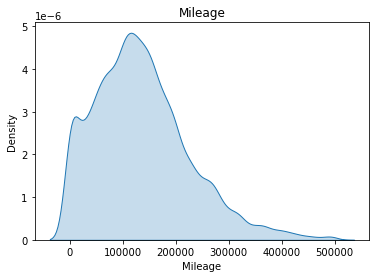

In [30]:
sns.kdeplot(X['Mileage'], shade=True)
plt.title('Mileage')
plt.show()

In [31]:
from scipy.stats.mstats import normaltest
normaltest(X.Mileage.values)

NormaltestResult(statistic=1913.6571303208557, pvalue=0.0)

Normaltest still suggests that 'Mileage' distribution is not normal but distribution is much less skewed now.

Now, We we try to visualize the distribution of 'Price' for different class of categorical variables.

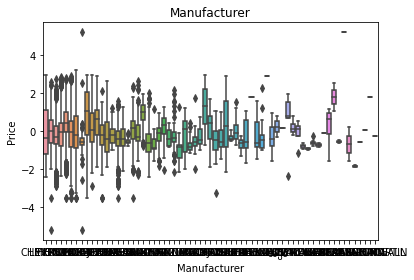

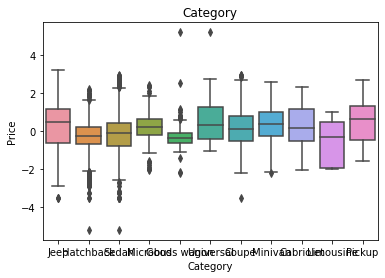

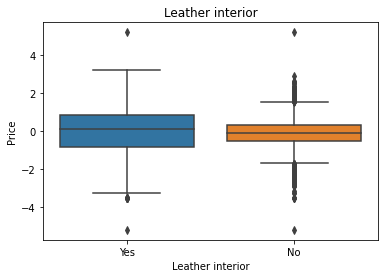

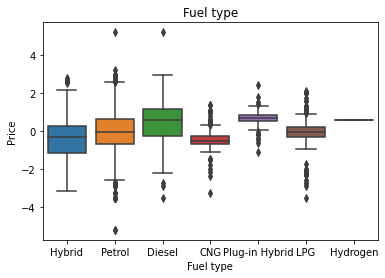

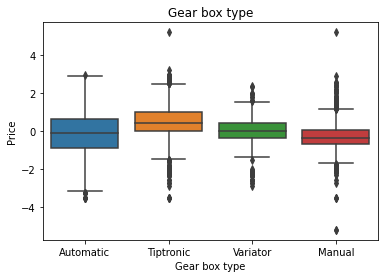

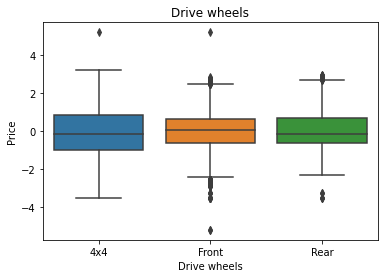

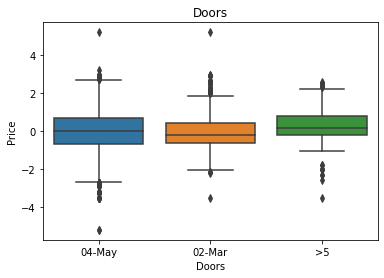

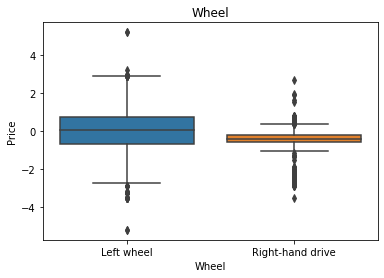

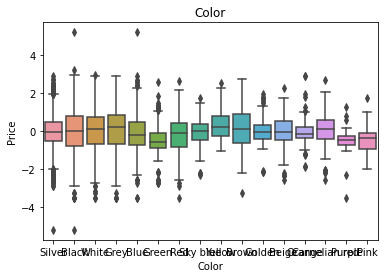

In [32]:
for col in X.select_dtypes(include=['object']).columns:
    sns.boxplot(x=col, y='Price', data=X)
    plt.title(col)
    plt.show()

From the above plots in looks like some categorical variable like 'Manufacturer', 'Fuel-type' can be used as predictor of 'Price'.

Let's look into the co-relation between different continuous variable.

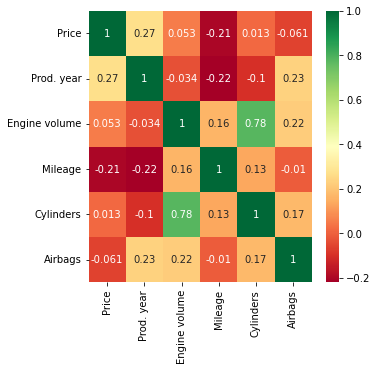

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

plt.show()

From the above it looks like their is co-relation between 'Prod.year' and 'Mileage' with 'Price'. So,'Prod.year' and 'Mileage' can be good predictor of 'Price'.

Another thing can also be noticed that there are co-relations between features as well which can cause model some problem. So, we might need to deal with it later.

Let's  visually see the relation between our dependent variable 'Price' and other continuous features.

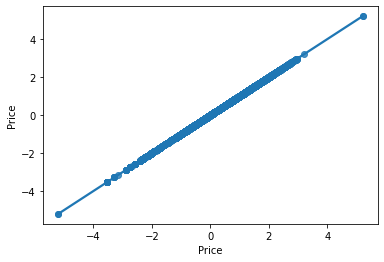

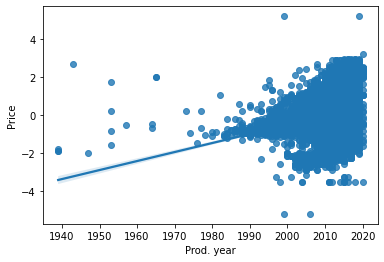

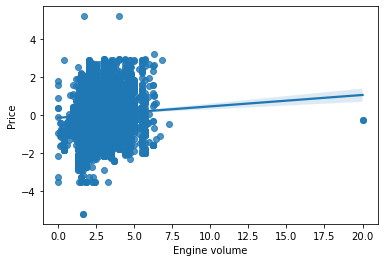

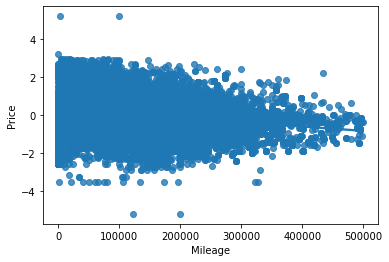

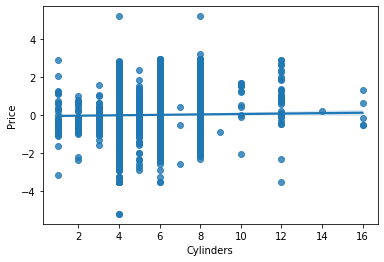

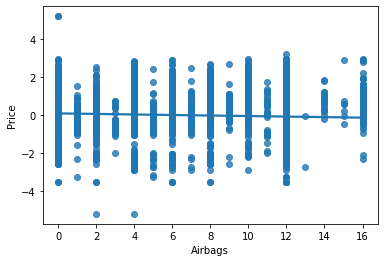

In [34]:
mask_numeric = X.dtypes != np.object
numeric_cols = X.columns[mask_numeric]
numeric_cols=numeric_cols.tolist()
for col in numeric_cols:
    sns.regplot( x = X[col], y = X.Price)
    plt.show()

It's look like except 'Prod.year' no other continuous variable have strong relation with 'Price'.

But for now, we will use all the features for the prediction of our dependent variable 'Price'.

Before that we need to convert the categorical variable to numeric form so that we can use them in our model.Let' use one-hot encoding for this. 

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), category_cols) ],remainder="passthrough")
X=one_hot.fit_transform(X)

In [36]:
names=one_hot.get_feature_names_out()
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]

In [37]:
X=X.toarray()

Let's check our new variable after one-hot encoding.

In [38]:
X=pd.DataFrame(data=X,columns=colunm_names)
X

,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,Silver,Sky blue,White,Yellow,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.002512,2010.0,3.5,186005.0,6.0,12.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.269461,2011.0,3.0,192000.0,6.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.413338,2006.0,1.3,200000.0,4.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.822449,2011.0,2.5,168966.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.127923,2014.0,1.3,91901.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.413338,1999.0,2.0,300000.0,4.0,5.0
18663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.192060,2011.0,2.4,161600.0,4.0,8.0
18664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.862117,2010.0,2.0,116365.0,4.0,4.0
18665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.676067,2007.0,2.0,51258.0,4.0,4.0


Let's split our new dataset into training set and test set.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
y=X.pop('Price')

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

Let's standardized our features using Standardscaler. We don't need standardize our dependent variable 'Price' because during transformation of variable 'Price' to fix skew we actually changed the scale of the variable also close to zero.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss=StandardScaler()

In [44]:
numeric_cols.remove('Price')

In [45]:
X_train[numeric_cols]=ss.fit_transform(X_train[numeric_cols])

In [46]:
X_test[numeric_cols]=ss.transform(X_test[numeric_cols])

Let's visualize the training data  after the the standardscaling.

In [47]:
X_train

,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,Red,Silver,Sky blue,White,Yellow,Prod. year,Engine volume,Mileage,Cylinders,Airbags
15348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.722257,-0.572618,0.591144,-0.483567,1.245111
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.250921,0.213253,-1.298751,1.176736,1.245111
1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.392400,0.100986,0.243109,-0.483567,-0.599822
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.017371,1.335926,1.375519,1.176736,1.245111
11696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.017371,-1.133955,-0.127696,-0.483567,-0.599822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.369814,2.570867,0.752264,2.837038,-1.522288
13123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.158850,-0.797153,-0.518342,-0.483567,-0.599822
9845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.039957,0.100986,0.325260,-0.483567,-1.061055
10799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.335072,0.213253,-0.216243,-0.483567,-0.599822


# 4. Linear Regression Models

## a. Linear Regression

Let's build our first Linear Regression model using all the features.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Let's predict and check R^2 score on the test set and train set. 

In [49]:
car_price_predictions_lm = lm.predict(X_test)

In [50]:
r2_score(y_test,car_price_predictions_lm)

-2.906346739769424e+22

In [51]:
r2_score(y_train,lm.predict(X_train))

0.3394831143522353

From the R^2 score of test set and train set we can conclude that current model is over fitting because test set R^2 score highly negative but train set R^2 score in positive.  

## b.  Linear Regression with polynominal features

We will now add polynominal features to our dataset to see wheather it can give us better reults. At first we will try with polynonimal features of degree 2.

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [53]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

Let's train our model on this new dataset with polynominal features.

In [54]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

LinearRegression()

Let's check R^2 score on test set and train set.

In [55]:
r2_score(y_test,lm_poly.predict(X_test_poly))

-4.6262657109329655e+20

In [56]:
r2_score(y_train,lm_poly.predict(X_train_poly))

0.6046039294302823

From the R^2 score of test set and train set we can see that situation didn't improve as model is still over fitting on the train set as R^2 score is small on train set and highly negative on test set.

Let's try with different degrees(1,2,3,4) of polynominal features to see whether situation can improve. For that we will use GridSearchCV to find a optimal polynominal degree.

In [57]:
from sklearn.pipeline import Pipeline
Input_lm_poly=[ ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe_lm_poly=Pipeline(Input_lm_poly)

In [58]:
param_grid_lm_poly = {"polynomial__degree": [1, 2, 3, 4]}

In [59]:
from sklearn.model_selection import GridSearchCV
lm_poly_search = GridSearchCV(pipe_lm_poly, param_grid_lm_poly, n_jobs=8,cv=4)

In [60]:
lm_poly_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=8, param_grid={'polynomial__degree': [1, 2, 3, 4]})

In [61]:
lm_poly_best=lm_poly_search.best_estimator_
print(lm_poly_best.get_params())

{'memory': None, 'steps': [('polynomial', PolynomialFeatures(degree=1, include_bias=False)), ('model', LinearRegression())], 'verbose': False, 'polynomial': PolynomialFeatures(degree=1, include_bias=False), 'model': LinearRegression(), 'polynomial__degree': 1, 'polynomial__include_bias': False, 'polynomial__interaction_only': False, 'polynomial__order': 'C', 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}


After doing gridsearch we can see that Polynominal Features of degree 1 gives us the best fit. Let's checjk R^2 score on the test set based on the best fit. (As polynominal feature parameter for best model iss 1 so is just like linear regression with no polynominal features. So, It will still overfit we can say for sure from our early experience. But we will still check for shake of completeness.)

In [62]:
r2_score(y_test,lm_poly_best.predict(X_test))

-6.489359908922609e+21

The best model is also overiftting.

So,we need to take different approach.

## c. Regularization Regression

### i). Lasso

We will first fit a Lasso with alpha value 0.001 along with polynominal features of degree 2.

In [63]:
from sklearn.linear_model import Lasso
Input_lm_poly_lasso=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',Lasso(alpha=0.001, tol = 0.2,max_iter=10000))]
pipe_lm_poly_lasso = Pipeline(Input_lm_poly_lasso)

In [64]:
pipe_lm_poly_lasso.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.001, max_iter=10000, tol=0.2))])

Let's check score on test set and train set.

In [65]:
r2_score(y_test,pipe_lm_poly_lasso.predict(X_test))

0.49160566464196376

In [66]:
r2_score(y_train,pipe_lm_poly_lasso.predict(X_train))

0.5339352247399016

From the R^2 score on test set and train set we can see that model isn't overfitting anymore.

Let's try the current model 'pipe_lm_poly_lasso' with different value of alpha and different degree of polynominal features. So, We will perform hyperparameter tuning.

In [67]:
param_grid_lm_poly_lasso = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.00001,0.0001,0.001,0.01,0.1,1,10]
}

In [68]:
lm_poly_lasso_search = GridSearchCV(pipe_lm_poly_lasso, param_grid_lm_poly_lasso, n_jobs=8,cv=4)
lm_poly_lasso_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model',
                                        Lasso(alpha=0.001, max_iter=10000,
                                              tol=0.2))]),
             n_jobs=8,
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10],
                         'polynomial__degree': [1, 2, 3, 4, 5]})

In [69]:
lm_poly_lasso_best=lm_poly_lasso_search.best_estimator_
print(lm_poly_lasso_best.get_params())

{'memory': None, 'steps': [('polynomial', PolynomialFeatures(include_bias=False)), ('model', Lasso(alpha=0.001, max_iter=10000, tol=0.2))], 'verbose': False, 'polynomial': PolynomialFeatures(include_bias=False), 'model': Lasso(alpha=0.001, max_iter=10000, tol=0.2), 'polynomial__degree': 2, 'polynomial__include_bias': False, 'polynomial__interaction_only': False, 'polynomial__order': 'C', 'model__alpha': 0.001, 'model__copy_X': True, 'model__fit_intercept': True, 'model__max_iter': 10000, 'model__positive': False, 'model__precompute': False, 'model__random_state': None, 'model__selection': 'cyclic', 'model__tol': 0.2, 'model__warm_start': False}


We can see that the best value of parameter alpha is 0.001 and best degree for polynominal feature is 2.

Let's check what is the R^2 score on test set.

In [70]:
r2_score(y_test,lm_poly_lasso_best.predict(X_test))

0.49160566464196376

From the score we can say that the best model explain 49.16% of variance in data.

### ii). Ridge Regression

Let's try another Regularization model 'Ridge Regression'  in the hope of getting better prediction. We will do hyperparameter tuning directly this time with several value for  alpha along with different degree of polynominal features.

In [71]:
from sklearn.linear_model import Ridge
Input_lm_poly_ridge=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',Ridge(alpha=1))]
pipe_lm_poly_ridge = Pipeline(Input_lm_poly_ridge)

In [72]:
param_grid_lm_poly_ridge = {
    "polynomial__degree": [1,2,3,4,5],
    "model__alpha":[0.001,0.01,0.1,1,10,50,100]
}

In [73]:
lm_poly_ridge_search = GridSearchCV(pipe_lm_poly_ridge, param_grid_lm_poly_ridge, n_jobs=8,cv=4)
lm_poly_ridge_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=8,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'polynomial__degree': [1, 2, 3, 4, 5]})

In [74]:
lm_poly_ridge_best=lm_poly_ridge_search.best_estimator_
lm_poly_ridge_best.get_params()

{'memory': None,
 'steps': [('polynomial', PolynomialFeatures(include_bias=False)),
  ('model', Ridge(alpha=50))],
 'verbose': False,
 'polynomial': PolynomialFeatures(include_bias=False),
 'model': Ridge(alpha=50),
 'polynomial__degree': 2,
 'polynomial__include_bias': False,
 'polynomial__interaction_only': False,
 'polynomial__order': 'C',
 'model__alpha': 50,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__positive': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.0001}

We can see that value of alpha is 50 and degree of polynominal feature is 2 for best fit.

Let's check R^2 score on test set.

In [75]:
r2_score(y_test,lm_poly_ridge_best.predict(X_test))

0.5037012679456034

R^2 score on test set using Ridge Regression is comparatively better compared to Lasso.

In [76]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

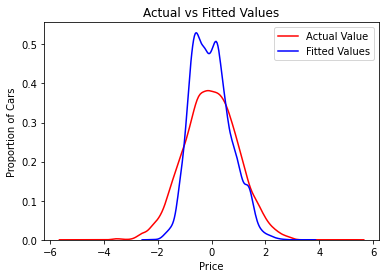

In [77]:
predicted_train=lm_poly_ridge_best.predict(X_train)
plot_dis(y_train,predicted_train)

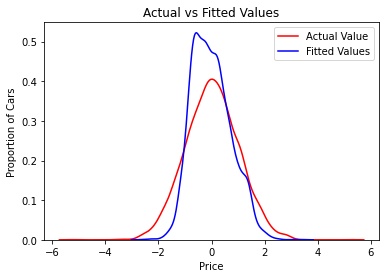

In [78]:
predicted_test=lm_poly_ridge_best.predict(X_test)
plot_dis(y_test,predicted_test)

A visual representation is shown that how 'lm_poly_ridge_best' model perform in predicting the dependent variable. 

# 5. Insights and key findings

i) The first thing we noticed was that our target variable 'Price' distribution was severly skewed which could have create problem for our model to properly fitting the data. So, we transform the 'Price' variable to reduced the skewness and make it more normal.

ii) The 'mileage' variables distribution was also severely skewed. But this time isntead of transformation we remove ouliers to make the distribution more normal. We didn't go for transformation this time becaause of  presence of 0 in the data.

iii) We look into the distribution of 'Price' for different class of categorical variable and find out some variable like 'Manufacturer' category can be an useful predictor.

iv) We look into the co-relation between different categorical variable and find out that 'Mileage' and 'Prod.year' have good co-relation with 'Price'.So,This variable can be used as predictor. But there is co-relations among the features itself which can be a problem so we might need to deal with it someway.

v) Then we converted the categorical variable to numeric variable using one hot encoding. This can a very big of a datset.

vi) We first fit a Linear Regression model using all the variable and found out that the model is overfitting. That is happening maybe because of lots of highly co-related variable in dataset due to one hot encoding.

vii) We tried to fit polynominal features of different degree to get better result but failed to reduce overfitting.

viii) We then applied regularization techniques like Lasso and Ridge Regression to reduce overfitting and it indeed gives us a better results with good prediction.

# 6. Next Steps

As our main focus is to get good predictions so we can try to use more advanced non-linear models like Random forest shown below.

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features= 'sqrt',random_state=42)

In [80]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [81]:
r2_score(y_test,rf.predict(X_test))

0.6944617531267814

We get a R^2 score of 69.56% on test set which is significantly better than all the previous models.

We can now try to do hyperparameter tuning to get better prediction which in turn will give us better R^2 score.

In [82]:
param_grid_rf = {'n_estimators': [200, 300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
rf = RandomForestRegressor(random_state=42)

rf_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf,cv=4, n_jobs=8, verbose=1)

rf_search.fit(X_train,y_train)
print("Best parameters: ", rf_search.best_params_)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best parameters:  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [83]:
best_rf=rf_search.best_estimator_

In [84]:
best_rf.score(X_test,y_test)

0.700182575939156

With best parameter we can see that our R^2 improved.

Now we might be able to improve this result using PCA. This can deal with the problem of presence of higly co-related variables in the dataset as well as the problem of having this big of a dataset.

Let's create principal components.

In [85]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [86]:
X_train_hat = pca.transform(X_train)
print(X_train_hat.shape)

(13066, 118)


Text(0.5, 1.0, 'Component-wise variance and cumulative explained variance')

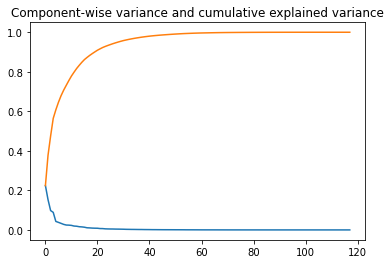

In [87]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise variance and cumulative explained variance")

From the above plot,We can see that close to sixty variable can explain almost 100% of the variance in the dataset.

In [88]:
X_train_hat_PCA = pd.DataFrame(columns=[f'Projection  on Component {i+1}' for i in range(len(X_train.columns))], data=X_train_hat)
X_train_hat_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,...,Projection on Component 109,Projection on Component 110,Projection on Component 111,Projection on Component 112,Projection on Component 113,Projection on Component 114,Projection on Component 115,Projection on Component 116,Projection on Component 117,Projection on Component 118
0,-0.456203,-1.129399,1.542559,0.417102,0.798811,-0.220258,0.407268,0.557820,-1.000149,-0.215901,...,-2.990244e-17,-8.436549e-17,-9.182308e-17,-8.346959e-17,-5.895051e-17,-3.199060e-17,2.036487e-17,-4.265391e-17,3.894601e-17,1.663984e-16
1,0.794137,-2.217397,-0.673886,0.624524,-0.435046,-0.529292,0.511589,0.404980,-0.544971,-0.276297,...,-1.516412e-16,-3.937730e-17,-2.400354e-17,-1.632161e-16,-4.843534e-17,3.632901e-18,2.137049e-17,-3.046415e-17,-1.961757e-17,-1.013420e-16
2,-0.042077,1.720231,-0.248403,0.092927,0.996774,0.251704,-0.455862,0.307835,0.103626,0.839809,...,-1.866813e-16,1.925133e-16,3.889525e-18,3.858167e-16,-2.694943e-16,3.556051e-17,-1.433305e-16,-1.129712e-16,-2.813146e-16,2.407616e-16
3,2.445325,-0.205910,1.137702,0.220597,-0.542845,-0.288516,-0.193327,0.512208,0.653375,0.164610,...,4.133478e-17,-7.171860e-17,2.008995e-17,-8.015508e-17,-2.701083e-17,1.617770e-17,1.624730e-17,-3.996633e-17,-2.363033e-17,1.680233e-16
4,-1.647855,0.604614,0.035089,0.082695,0.961841,-1.063316,0.647976,0.167889,-0.300991,-0.368682,...,-3.350575e-16,4.427674e-17,6.580767e-17,5.182127e-17,-1.545869e-16,-1.097955e-16,-8.898742e-17,7.653417e-17,-6.703178e-17,-5.570338e-16


Let's create our training dataset.

In [89]:
N = 60
X_train_hat_PCA = X_train_hat_PCA.iloc[:, :N]

Let's use a Random forest Regressor to fit this data.

In [90]:
rf_pca = RandomForestRegressor(n_estimators=100, max_features= 'sqrt')

In [91]:
rf_pca.fit(X_train_hat_PCA,y_train)

RandomForestRegressor(max_features='sqrt')

We need to convert the test se as well.

In [92]:
X_test_hat = pca.transform(X_test)

In [93]:
X_test_hat_PCA = pd.DataFrame(columns=[f'Projection  on Component {i+1}' for i in range(len(X_train.columns))], data=X_test_hat)
X_test_hat_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,...,Projection on Component 109,Projection on Component 110,Projection on Component 111,Projection on Component 112,Projection on Component 113,Projection on Component 114,Projection on Component 115,Projection on Component 116,Projection on Component 117,Projection on Component 118
0,-0.939864,0.472273,-0.048738,-0.984473,0.079838,-0.484163,0.253603,-0.515581,-1.302907,-0.283778,...,3.679175e-17,-6.119839e-17,2.263452e-18,2.902123e-17,6.660710e-17,-4.022814e-18,1.330125e-16,-8.112182e-17,3.458077e-18,2.628114e-16
1,3.464294,0.251371,-2.139278,-1.556077,0.035251,-0.943718,0.082607,-0.988531,0.446659,-0.204918,...,-3.576265e-16,2.368723e-17,8.777589e-17,-1.730374e-16,-1.635469e-16,-1.025841e-16,7.814516e-19,1.282882e-16,-1.179921e-17,-4.363636e-17
2,-0.770655,0.213936,1.386916,0.389264,-0.070470,0.231768,0.780798,0.634872,-0.237527,-0.244714,...,1.145449e-16,8.953448e-17,-7.682546e-17,1.495706e-16,5.164316e-17,1.551749e-16,3.449345e-18,-8.441086e-17,4.189957e-17,3.597609e-17
3,-1.000692,-0.537308,-0.683932,-0.599521,-0.201263,0.759499,0.643522,-0.328630,0.145179,-0.184335,...,1.188990e-16,1.844638e-16,-4.418974e-17,2.046731e-16,1.648474e-16,9.930790e-17,-4.816548e-17,-4.367644e-17,3.571981e-17,-1.964034e-16
4,2.207946,-0.105253,0.051848,0.568759,0.880202,0.920216,-0.610843,-0.583551,0.223979,-0.555873,...,-8.943698e-19,1.460627e-17,-6.570577e-17,-1.328710e-17,-1.080508e-16,1.279156e-17,-4.595799e-17,-8.902145e-17,4.573074e-17,1.325107e-16


Let's create test dataset.

In [94]:
X_test_hat_PCA = X_test_hat_PCA.iloc[:, :N]

In [95]:
r2_score(y_test,rf_pca.predict(X_test_hat_PCA))

0.6577151299039611

The R^2 score is found to be 65.81% which is not an improvement but hypeparameter tuning might give us a better result.

In [96]:
param_grid_rf_pca= {'n_estimators': [200, 300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
rf_pca= RandomForestRegressor(random_state=42)

rf_search_pca = GridSearchCV(estimator=rf_pca, param_grid=param_grid_rf_pca,cv=4, n_jobs=8, verbose=1)

rf_search_pca.fit(X_train_hat_PCA,y_train)
print("Best parameters: ", rf_search_pca.best_params_)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best parameters:  {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [97]:
best_rf_pca=rf_search_pca.best_estimator_

In [98]:
best_rf_pca.score(X_test_hat_PCA,y_test)

0.6653690634227016

By hyperparameter tuning we get a result of 66.54% for R^2 which is improvement over previous PCA data fitted model but still under performing compared to  Random Forest Regressor with actual data. Maybe more exhaustive GridSearch can give us a better result.